<a href="https://colab.research.google.com/github/Mahesh200457/RESTAURANT-RATING-PREDICTION-AND-ANALYSIS/blob/main/RESTAURANT_RATING_PREDICTION_AND_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                                 
#                              **PROJECT:RESTAURANT RATING PREDICTION AND ANALYSIS**

**Level 1**

**Task 1: Data Exploration and Preprocessing**

1.  Explore the dataset and identify the number
of rows and columns
2.  Check for missing values in each column and
handle them accordingly.
3.  Perform data type conversion if necessary.
Analyze the distribution of the target variable
("Aggregate rating") and identify any class
imbalances.




**1.1:Explore the dataset and identify the number of rows and columns**

In [68]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("cognify.xlsx")  # Make sure the file is in your working directory

# Display the shape of the DataFrame
print("Number of rows and columns:", df.shape)


Number of rows and columns: (9551, 21)


1.2:**Look for missing values in each column:**

*  For each column in the data, we will check how many missing values there are. Missing values are usually marked as NaN in pandas.




In [69]:
print("\nMissing values per column:")
for col in df.columns:
    missing_count = df[col].isnull().sum()  # Count how many missing values are in this column
    print(f"{col}: {missing_count} missing values")



Missing values per column:
Restaurant ID: 0 missing values
Restaurant Name: 0 missing values
Country Code: 0 missing values
City: 0 missing values
Address: 0 missing values
Locality: 0 missing values
Locality Verbose: 0 missing values
Longitude: 0 missing values
Latitude: 0 missing values
Cuisines: 9 missing values
Average Cost for two: 0 missing values
Currency: 0 missing values
Has Table booking: 0 missing values
Has Online delivery: 0 missing values
Is delivering now: 0 missing values
Switch to order menu: 0 missing values
Price range: 0 missing values
Aggregate rating: 0 missing values
Rating color: 0 missing values
Rating text: 0 missing values
Votes: 0 missing values


**Fill missing values for numerical columns**

* If the column contains numbers, we fill the missing values with the average (mean) of that column.




In [70]:
numerical_cols = df.select_dtypes(include=['number']).columns  # Find columns with numbers
for col in numerical_cols:
    if df[col].isnull().any():  # If there are missing values in this column
        mean_val = df[col].mean()  # Calculate the mean (average) of the column
        df[col].fillna(mean_val, inplace=True)  # Replace missing values with the mean
        print(f"Filled missing values in '{col}' with the mean ({mean_val})")


**Fill missing values for non-numerical columns**

* If the column contains words or categories (like names, locations, etc.), we fill the missing values with the most frequent value in that column








In [71]:
categorical_cols = df.select_dtypes(exclude=['number']).columns  # Find non-numeric columns
for col in categorical_cols:
    if df[col].isnull().any():  # If there are missing values in this column
        mode_val = df[col].mode()[0]  # Find the most frequent value in the column
        df[col].fillna(mode_val, inplace=True)  # Replace missing values with the most frequent value
        print(f"Filled missing values in '{col}' with the mode ({mode_val})")


Filled missing values in 'Cuisines' with the mode (North Indian)


<ipython-input-71-78bc88a2d1db>:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





**Check if there are any missing values left**

*  After filling the missing values, it's important to check again to ensure that no missing values remain.




In [72]:
print("\nMissing values per column after handling:")
for col in df.columns:
    missing_count = df[col].isnull().sum()  # Check if there are still any missing values
    print(f"{col}: {missing_count} missing values")



Missing values per column after handling:
Restaurant ID: 0 missing values
Restaurant Name: 0 missing values
Country Code: 0 missing values
City: 0 missing values
Address: 0 missing values
Locality: 0 missing values
Locality Verbose: 0 missing values
Longitude: 0 missing values
Latitude: 0 missing values
Cuisines: 0 missing values
Average Cost for two: 0 missing values
Currency: 0 missing values
Has Table booking: 0 missing values
Has Online delivery: 0 missing values
Is delivering now: 0 missing values
Switch to order menu: 0 missing values
Price range: 0 missing values
Aggregate rating: 0 missing values
Rating color: 0 missing values
Rating text: 0 missing values
Votes: 0 missing values


**1.3.Perform data type conversion if necessary.
Analyze the distribution of the target variable
("Aggregate rating") and identify any class
imbalances.**




**step 1: Checking and Converting Data Type (if needed)**


* Before we start analyzing the data, we need to make sure that the "Aggregate rating" column contains numbers. Sometimes, data might look like numbers but actually be stored as text. So, we check the data type and, if necessary, try to convert it to numeric.

**Code explanation**:: We check if the column is numeric using pd.api.types.is_numeric_dtype(). If it’s not, we try to convert it using pd.to_numeric(). If conversion fails, we print an error message.




In [73]:
if not pd.api.types.is_numeric_dtype(df['Aggregate rating']):
    try:
        df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')
        print("Converted 'Aggregate rating' to numeric.")
    except:
        print("Could not convert 'Aggregate rating' to numeric. Check for inconsistencies in the column.")


**Step 2:Plot Distribution of 'Aggregate rating' (if numeric)**


*  Once we ensure the column is numeric, we analyze how the ratings are distributed across different values using a histogram.
***Code Explanation**: We use seaborn.histplot() to create the histogram and plt.show() to display it. The KDE (Kernel Density Estimate) line helps smooth out the histogram and shows the overall distribution.




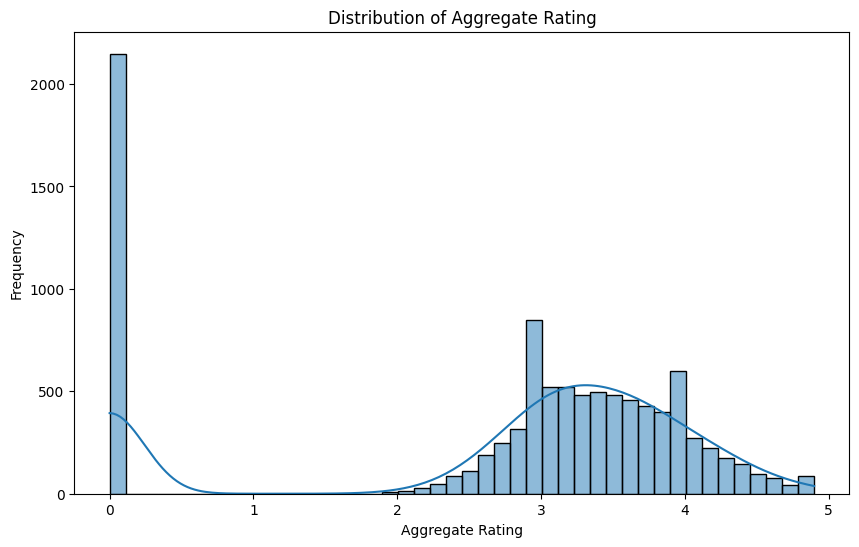

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
if pd.api.types.is_numeric_dtype(df['Aggregate rating']):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Aggregate rating'], kde=True)
    plt.title('Distribution of Aggregate Rating')
    plt.xlabel('Aggregate Rating')
    plt.ylabel('Frequency')
    plt.show()


**Step 3: Calculating Value Counts and Proportions**

*  Next, we need to calculate how many times each rating appears and what proportion each rating represents in the dataset.

For example:

If there are 100 ratings, and 50 of them are "4", the proportion of "4" is 50% (50 out of 100).



In [75]:
rating_counts = df['Aggregate rating'].value_counts()
rating_proportions = rating_counts / len(df)
print("\nValue Counts:")
print(rating_counts)
print("\nProportions:")
print(rating_proportions)




Value Counts:
Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64

Proportions:
Aggregate rating
0.0    0.224898
3.2    0.054654
3.1    0.054340
3.4    0.052141
3.3    0.050571
3.5    0.050257
3.0    0.049000
3.6    0.047953
3.7    0.044707
3.8    0.041880
2.9    0.039891
3.9    0.035075
2.8    0.032981
4.1    0.028688
4.0    0.027850
2.7    0.026175
4.2    0.023139
2.6    0.019998
4.3    0.018218
4.4    0.015077
2.5    0.011517
4.5    0.009947
2.4    0.009109
4.6    0.008167
4.9    0.006387
2.3    0.004921
4.7    0.004397
2.2    0.002827
4.8    0.002618
2.1    0.001571
2.0    0.000733
1.9    0.000209
1.8

**Step 4: Checking for Class Imbalance**:
Now, we want to check if one particular rating is too common compared to the others. This is called class imbalance. If one rating appears way more than others, it could affect analysis or machine learning models.

* We define a threshold (80%) and check if any rating appears more than that. If it does, we print a message to highlight the imbalance.If any rating has a proportion higher than 80%, it’s flagged as a potential issue.





In [76]:
imbalance_threshold = 0.8  # Define the threshold for significant imbalance
for rating, proportion in rating_proportions.items():
    if proportion > imbalance_threshold:
        print(f"\nPotential class imbalance detected for rating {rating} with proportion {proportion:.2f}")




**Task2: Descriptive Analysis**:

1.   Calculate basic statistical measures (mean,
median, standard deviation, etc.) for numerical
columns
2.  Explore the distribution of categorical
variables like Country Code,City,and Cuisines.
3.  Identify the top cuisines and cities with the
highest number of restaurants.


**2.1:Calculate basic statistical measures (mean, median, standard deviation, etc.) for numerical columns**

In [77]:
# prompt: Calculate basic statistical measures (mean, median, standard deviation, etc.) for numerical columns

# Calculate basic statistical measures for numerical columns
numerical_stats = df.describe()
print("\nBasic Statistical Measures for Numerical Columns:\n", numerical_stats)



Basic Statistical Measures for Numerical Columns:
        Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.00000

**2.2:Explore the distribution of categorical variables like Country Code,City,and Cuisines.**


Exploring the Distribution of 'Country Code':
Country Code
1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
94       21
166      20
184      20
191      20
37        4
Name: count, dtype: int64


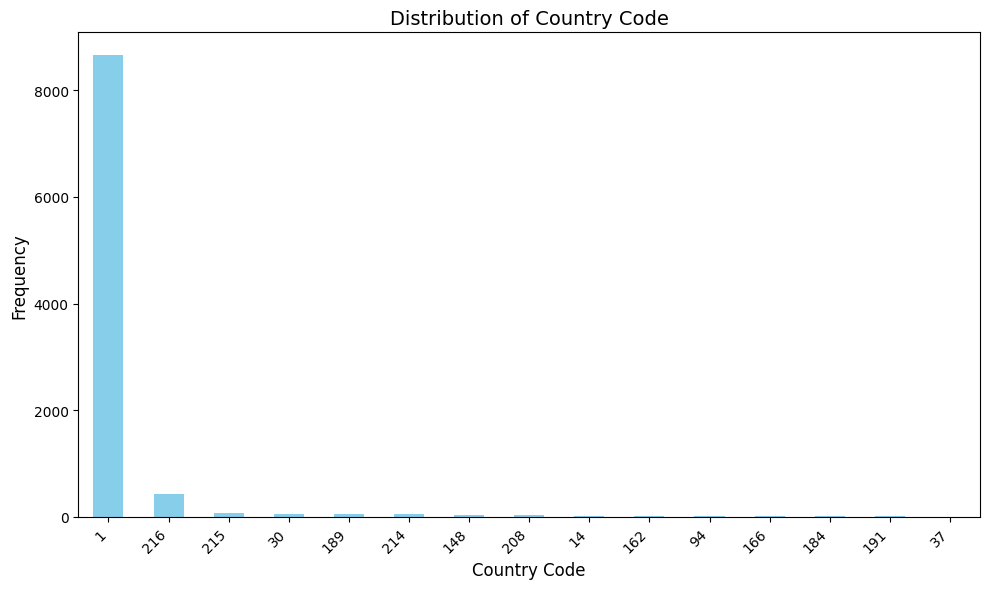


Exploring the Distribution of 'City':
City
New Delhi         5473
Gurgaon           1118
Noida             1080
Faridabad          251
Ghaziabad           25
                  ... 
Lakes Entrance       1
Mohali               1
Panchkula            1
Bandung              1
Randburg             1
Name: count, Length: 141, dtype: int64


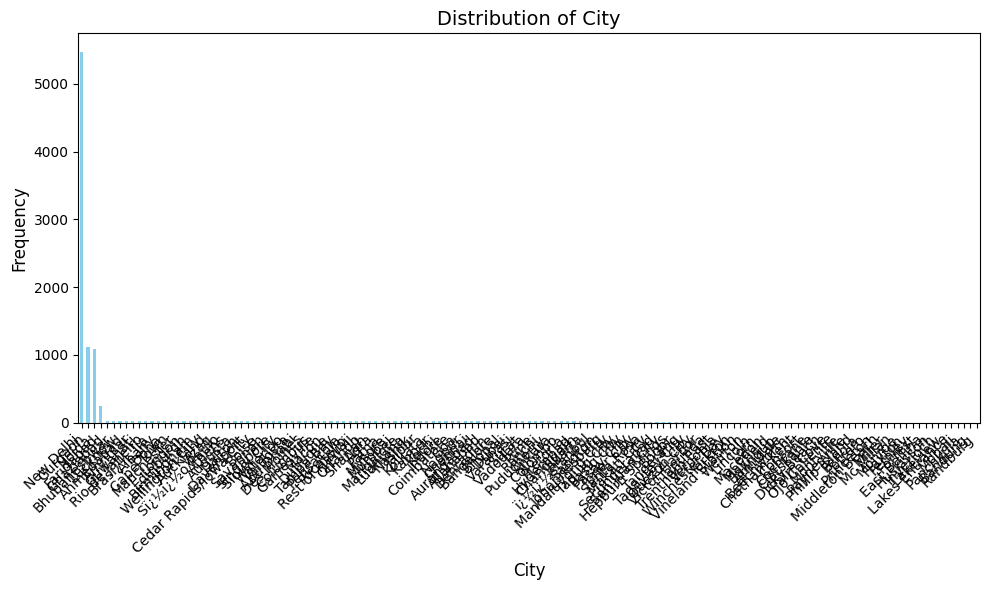


Exploring the Distribution of 'Cuisines':
Cuisines
North Indian                          945
North Indian, Chinese                 511
Fast Food                             354
Chinese                               354
North Indian, Mughlai                 334
                                     ... 
World Cuisine, Patisserie, Cafe         1
Burger, Izgara                          1
Desserts, Bï¿½_rek                      1
Restaurant Cafe, Turkish, Desserts      1
Restaurant Cafe, Desserts               1
Name: count, Length: 1825, dtype: int64


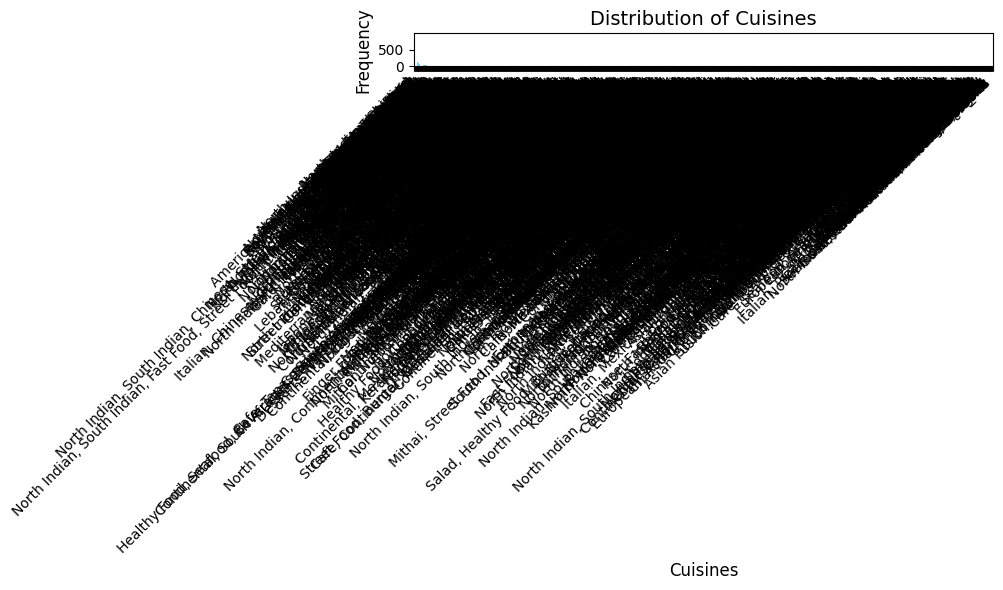

In [78]:
import matplotlib.pyplot as plt

# List of categorical columns we want to explore
categorical_columns = ['Country Code', 'City', 'Cuisines']

# Loop through each categorical column to explore its distribution
for column in categorical_columns:
    print(f"\nExploring the Distribution of '{column}':")

    # Count the occurrences of each unique value in the column
    value_counts = df[column].value_counts()

    # Print the count of unique values (how many times each category appears)
    print(value_counts)

    # Optional: Create a bar plot to visualize the distribution
    plt.figure(figsize=(10, 6))  # Set figure size for better clarity
    value_counts.plot(kind='bar', color='skyblue')  # Create a bar plot

    # Add titles and labels for clarity
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Rotate x-axis labels for better readability if necessary
    plt.xticks(rotation=45, ha='right')

    # Make sure the layout doesn't cut off labels or titles
    plt.tight_layout()

    # Display the plot
    plt.show()



In [79]:

# Get and display the top 10 most common cuisines
top_cuisines = df['Cuisines'].value_counts().head(10)
print("\nTop 10 Most Common Cuisines:")
print(top_cuisines)

# Get and display the top 10 most common cities
top_cities = df['City'].value_counts().head(10)
print("\nTop 10 Most Common Cities:")
print(top_cities)


Top 10 Most Common Cuisines:
Cuisines
North Indian                      945
North Indian, Chinese             511
Fast Food                         354
Chinese                           354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

Top 10 Most Common Cities:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Amritsar          21
Guwahati          21
Name: count, dtype: int64


**2.3:Identify the top cuisines and cities with the highest number of restaurants.**

In [80]:
top_cuisines = df['Cuisines'].value_counts().nlargest(10)  # Get the top 10 cuisines

# Step 2: Print out the top 10 cuisines to understand which are most popular
print("\nTop 10 Cuisines with the Highest Number of Restaurants:")
print(top_cuisines)


Top 10 Cuisines with the Highest Number of Restaurants:
Cuisines
North Indian                      945
North Indian, Chinese             511
Fast Food                         354
Chinese                           354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


**..Visualizing the top cuisines with a bar plot**

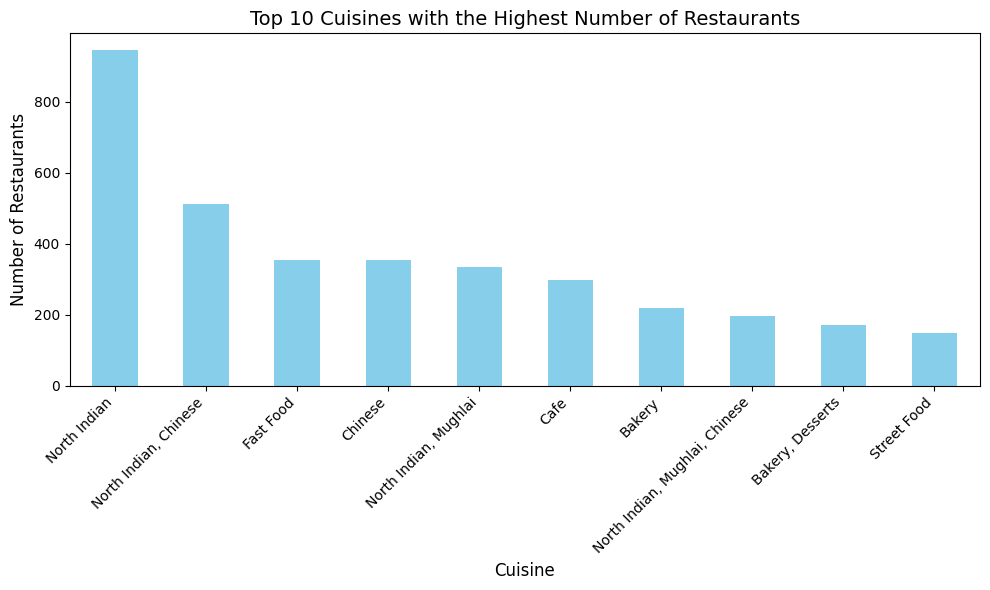

In [81]:

plt.figure(figsize=(10, 6))  # Set figure size for better readability
top_cuisines.plot(kind='bar', color='skyblue')  # Create a bar chart to show the top 10 cuisines
plt.title('Top 10 Cuisines with the Highest Number of Restaurants', fontsize=14)  # Title of the plot
plt.xlabel('Cuisine', fontsize=12)  # Label for the x-axis (Cuisine types)
plt.ylabel('Number of Restaurants', fontsize=12)  # Label for the y-axis (Number of restaurants)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

**Identify the Top Cities with the Highest Number of Restaurants**

In [82]:
top_cities = df['City'].value_counts().nlargest(10)  # Get the top 10 cities

# Step 4: Print out the top 10 cities to see which cities have the most restaurants
print("\nTop 10 Cities with the Highest Number of Restaurants:")
print(top_cities)


Top 10 Cities with the Highest Number of Restaurants:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Amritsar          21
Guwahati          21
Name: count, dtype: int64


**visualizing the top cities with a bar plot**

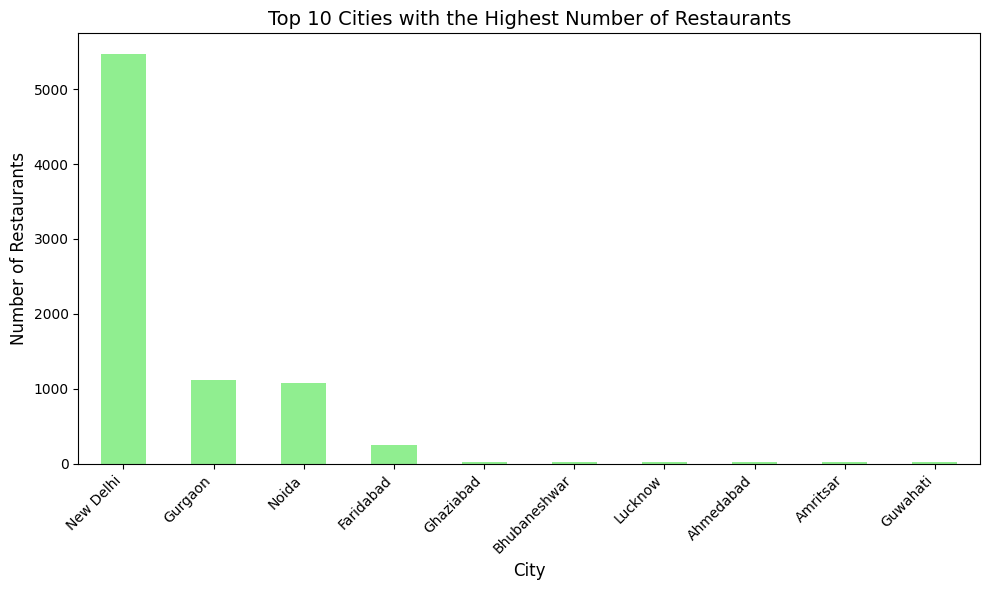

In [83]:
plt.figure(figsize=(10, 6))  # Set figure size for better readability
top_cities.plot(kind='bar', color='lightgreen')  # Create a bar chart to show the top 10 cities
plt.title('Top 10 Cities with the Highest Number of Restaurants', fontsize=14)  # Title of the plot
plt.xlabel('City', fontsize=12)  # Label for the x-axis (City names)
plt.ylabel('Number of Restaurants', fontsize=12)  # Label for the y-axis (Number of restaurants)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

**Task 3: Geospatial Analysis**


1.  Visualize the locations of restaurants on a
map using latitude and longitude
information.

2.   Analyze the distribution of restaurants
across different cities or countries.
Determine if there is any correlation
between the restaurant's location and its
rating.



**3.1:Visualize the locations of restaurants on a map using latitude and longitude information.**

In [84]:
import plotly.express as px
# First, you’ll need the plotly.express library, which is great for creating interactive visualizations.

In [85]:
fig = px.scatter_mapbox(
    df,
    lat="Latitude",  # Latitude of the restaurant
    lon="Longitude",  # Longitude of the restaurant
    hover_name="Restaurant Name",  # Displays restaurant name when hovering over
    hover_data=["City", "Aggregate rating"],  # Shows additional details when hovering
    color_discrete_sequence=["fuchsia"],  # Marker color
    zoom=3,  # Initial zoom level (adjust for broader or closer view)
    height=300)  # Height of the map
# Set map style
fig.update_layout(mapbox_style="open-street-map")

# Remove extra space around the map
fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})

# Show the map
fig.show()


**3.2:Analyze the distribution of restaurants across different cities or countries. Determine if there is any correlation between the restaurant's location and its rating.**

**Step 1: Analyze Restaurant Ratings by City**

**Explanation**: This step calculates the average restaurant rating for each city and sorts the cities by the average rating. It then displays a bar plot to visually compare the ratings across cities.



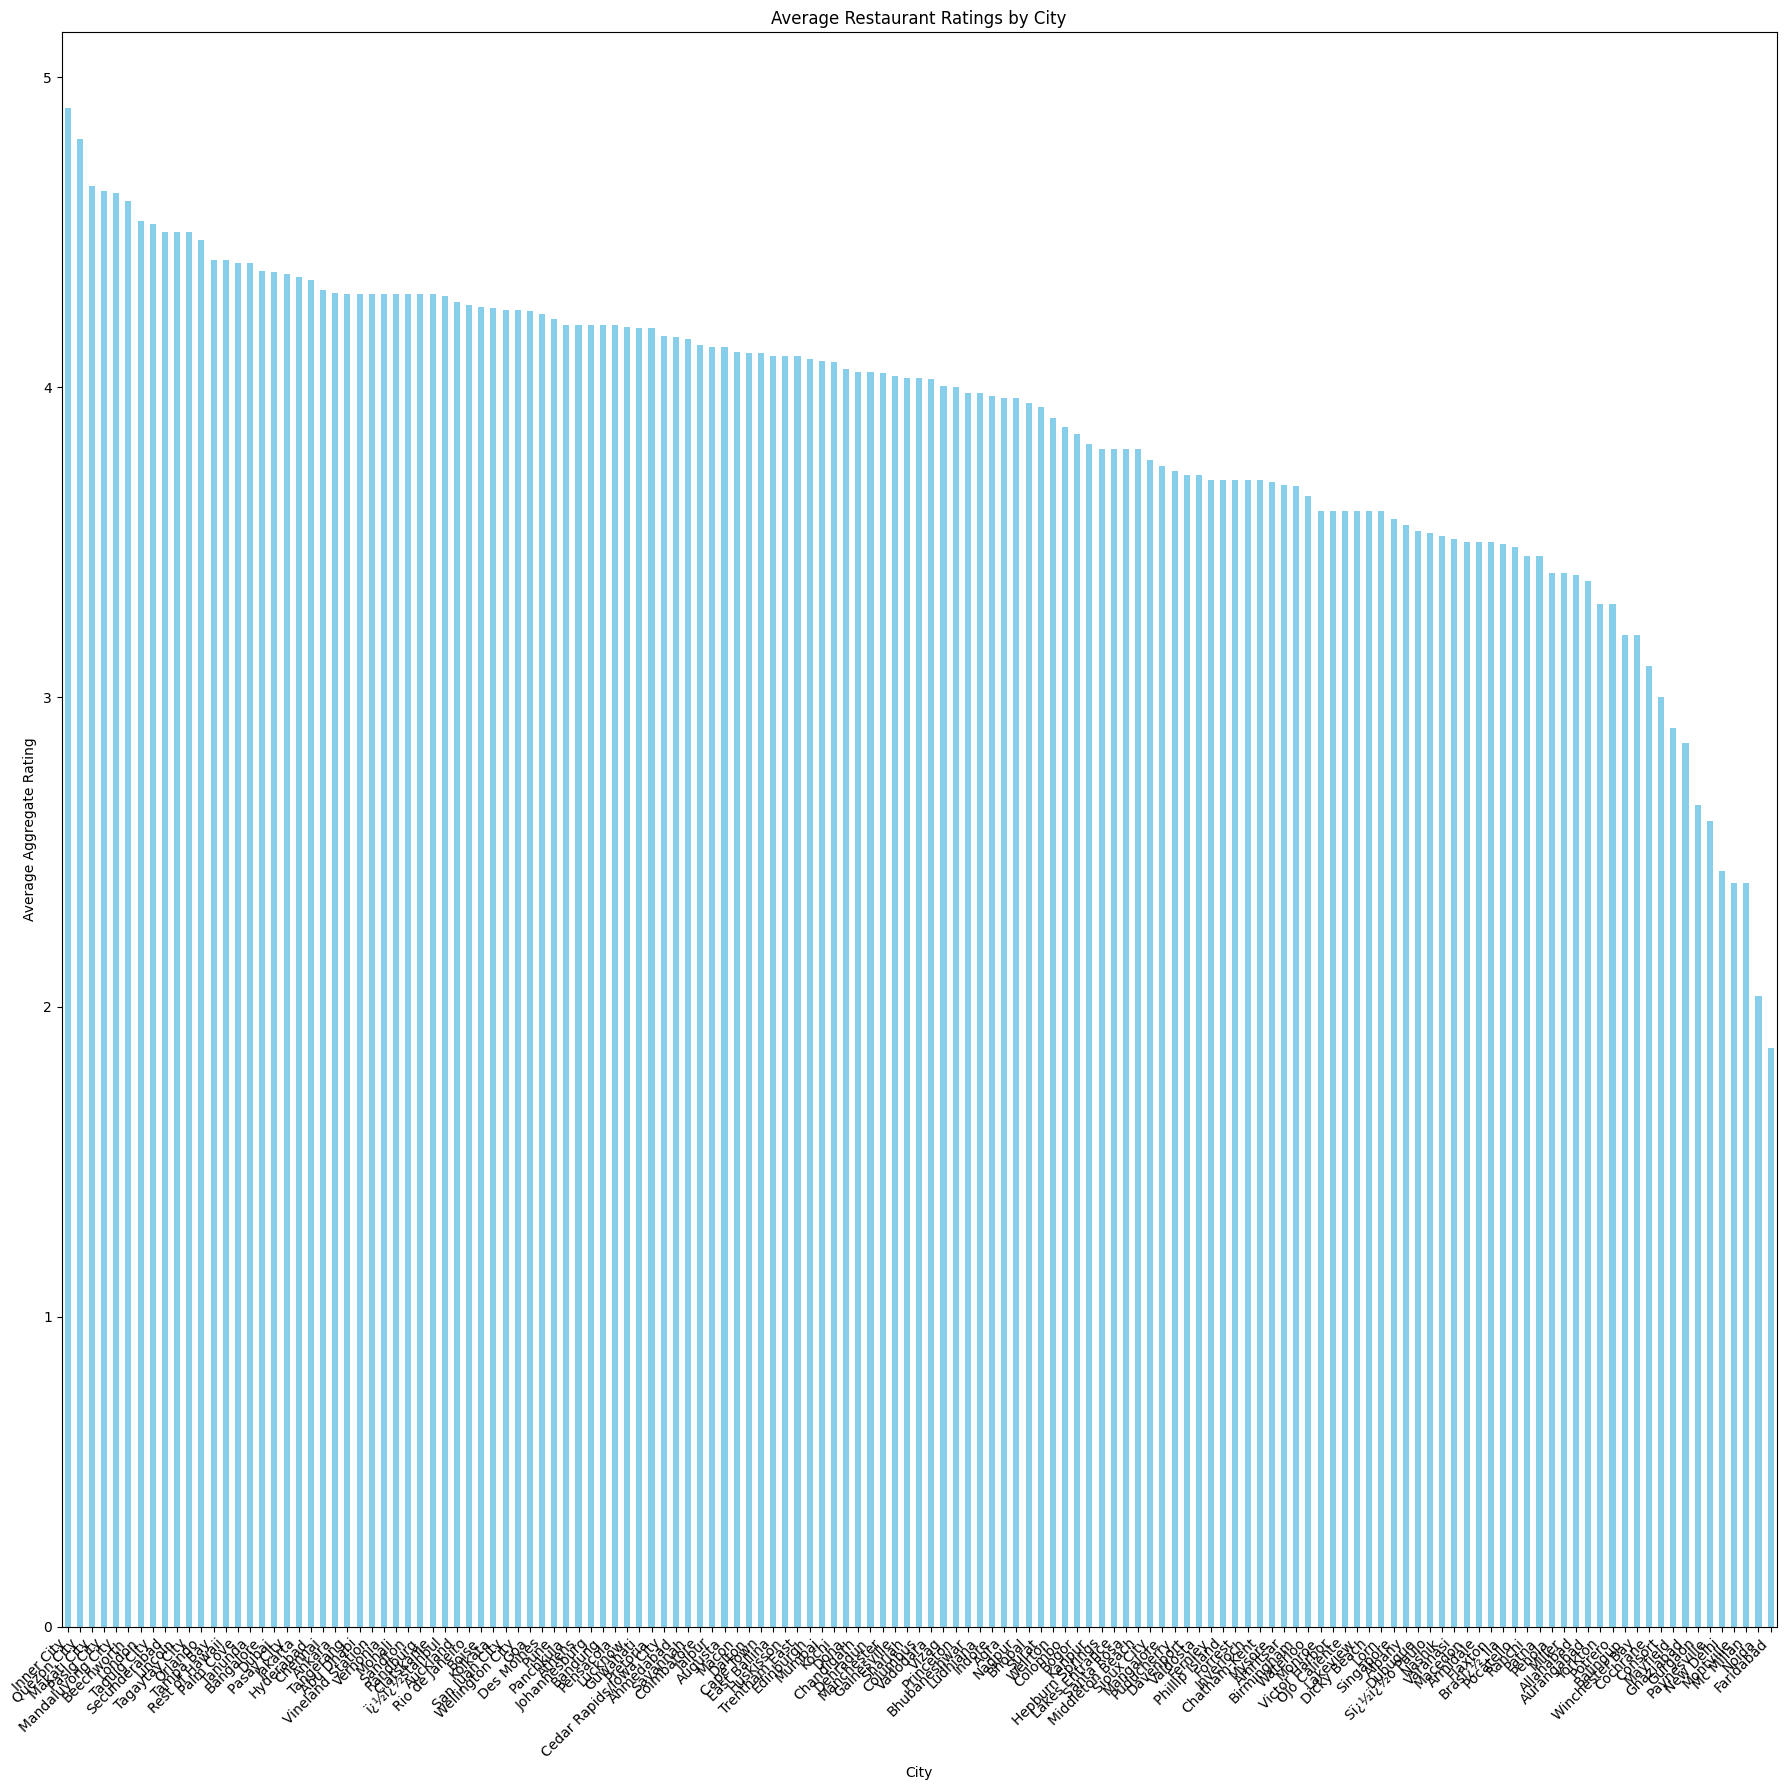

In [86]:
# Calculate the average rating for each city and sort the cities by average rating
city_ratings = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

# Create and display a bar plot for average ratings by city
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 18))
city_ratings.plot(kind='bar', color='skyblue')
plt.title('Average Restaurant Ratings by City')
plt.xlabel('City')
plt.ylabel('Average Aggregate Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**The x-axis labels (city names) in the bar plot are overlapping and clumsy, making it hard to read. Modify the plot to display only the top 15 cities by average rating and adjust the figure size and label rotation to improve readability**

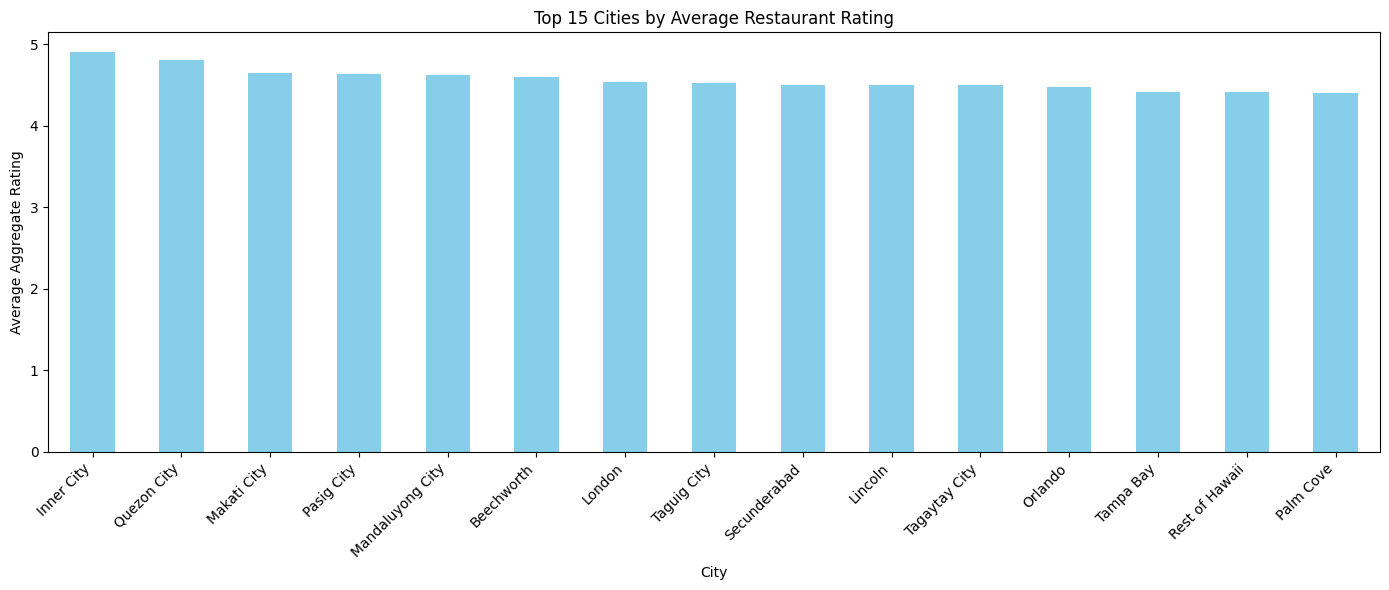

In [87]:
# Calculate the average rating for each city and sort the cities by average rating
city_ratings = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(15)  # Display top 15 cities

# Create and display a bar plot for average ratings by city
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))  # Wider figure
city_ratings.plot(kind='bar', color='skyblue')
plt.title('Top 15 Cities by Average Restaurant Rating')
plt.xlabel('City')
plt.ylabel('Average Aggregate Rating')
plt.xticks(rotation=45, ha='right')  # Rotate for better spacing
plt.tight_layout()
plt.show()


**Step 2: Correlation Analysis between Location and Ratin**

**Explanation**:This step calculates the correlation between the restaurant’s latitude/longitude and its rating to check if there’s any meaningful relationship between location and rating. It then prints the correlation values.

In [88]:
# Calculate and print the correlation between latitude/longitude and restaurant ratings
correlation_lat = df['Latitude'].corr(df['Aggregate rating'])
correlation_lon = df['Longitude'].corr(df['Aggregate rating'])

print(f"\nCorrelation between Latitude and Aggregate Rating: {correlation_lat}")
print(f"Correlation between Longitude and Aggregate Rating: {correlation_lon}")



Correlation between Latitude and Aggregate Rating: 0.0005155806902359908
Correlation between Longitude and Aggregate Rating: -0.11681757734540431


**Level 2**

**Task 1: Table Booking and Online Delivery**


1. Determine the percentage of restaurants that
offer table booking and online delivery.
2. Compare the average ratings of restaurants
with table booking and those without.
3. Analyze the availability of online delivery
among restaurants with different price ranges.



**1.1:Determine the percentage of restaurants that offer table booking and online delivery.**

**Step 1: Calculate Percentage of Restaurants**

**Expalnation**:We calculate the percentage of restaurants that offer table booking and online delivery using value_counts(normalize=True) * 100.



In [89]:
# Table Booking Percentage
table_booking_percentage = df['Has Table booking'].value_counts(normalize=True) * 100

# Online Delivery Percentage
online_delivery_percentage = df['Has Online delivery'].value_counts(normalize=True) * 100
table_booking_percentage, online_delivery_percentage


(Has Table booking
 No     87.875615
 Yes    12.124385
 Name: proportion, dtype: float64,
 Has Online delivery
 No     74.337766
 Yes    25.662234
 Name: proportion, dtype: float64)

**Step 2: Display the Results in a Clean Format**

**Explanation**:We loop through the percentages and print them in a clear and simple format that anyone, even non-technical users, can easily understand.

In [90]:
# Step 2: Display the results in a user-friendly format

print("📋 Table Booking Availability:")
for option, percentage in table_booking_percentage.items():
    print(f"- {option}: {percentage:.2f}%")

print("\n🚚 Online Delivery Availability:")
for option, percentage in online_delivery_percentage.items():
    print(f"- {option}: {percentage:.2f}%")


📋 Table Booking Availability:
- No: 87.88%
- Yes: 12.12%

🚚 Online Delivery Availability:
- No: 74.34%
- Yes: 25.66%


**1.2:Compare the average ratings of restaurants with table booking and those without.**

**Step 1: Calculate Average**

**Explanation:**We filter the dataset based on whether the restaurant offers table booking or not, and then calculate the average rating for each group.

In [91]:
# Step 1: Calculate average ratings based on table booking availability

avg_rating_with_booking = df[df['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
avg_rating_without_booking = df[df['Has Table booking'] == 'No']['Aggregate rating'].mean()


**Step 2: Display the Results Clearly**

**Explanation:** We use formatted print statements to clearly show the average ratings for both groups, rounded to 2 decimal places.

In [92]:
# Step 2: Print the average ratings in a simple format

print(f"Average rating (with table booking): {avg_rating_with_booking:.2f}")
print(f" Average rating (without table booking): {avg_rating_without_booking:.2f}")


Average rating (with table booking): 3.44
 Average rating (without table booking): 2.56


**1.3:Analyze the availability of online delivery among restaurants with different price ranges.**


**Step 1: Analyze Online Delivery by Price Range**

**Explanation:** Step 1: Analyze Online Delivery by Price Range

In [93]:
# Step 1: Calculate the percentage of restaurants offering online delivery in each price range

price_range_delivery = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True) * 100
print("🚚 Online Delivery Availability by Price Range:\n")
print(price_range_delivery)


🚚 Online Delivery Availability by Price Range:

Price range  Has Online delivery
1            No                     84.225923
             Yes                    15.774077
2            No                     58.689367
             Yes                    41.310633
3            No                     70.809659
             Yes                    29.190341
4            No                     90.955631
             Yes                     9.044369
Name: proportion, dtype: float64


**Step 2: Display Results and Visualize**

**Explanation:**We first print the percentage results. Then, we plot a bar chart to visually compare how online delivery availability varies across different price ranges.

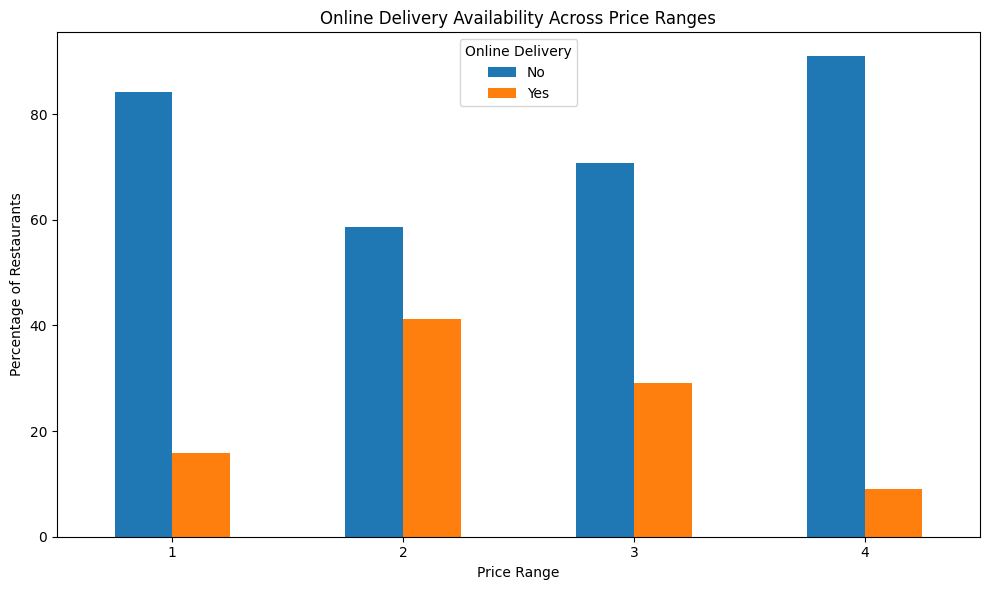

In [94]:


# Plotting the bar chart
price_range_delivery.unstack().plot(kind='bar', figsize=(10, 6))
plt.title('Online Delivery Availability Across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants')
plt.xticks(rotation=0)
plt.legend(title='Online Delivery')
plt.tight_layout()
plt.show()


**Task 2: Price Range Analysis**


1.  Determine the most common price range
among all the restaurants
2.  Calculate the average rating for each price
range.
3.  Identify the color that represents the highest
average rating among different price ranges.



**2.1:Determine the most common price range among all the restaurants**

**Explanation:** Explanation: Counts the number of restaurants in each price range. Retrieves and prints the most frequent price range from the counts.



In [95]:


# Calculate the value counts for the 'Price range' column
price_range_counts = df['Price range'].value_counts()
price_range_counts
# Get the most common price range


,count
Price range,
1,4444
2,3113
3,1408
4,586


In [96]:
most_common_price_range = price_range_counts.index[0]
print(f" The most common price range among all restaurants is: {most_common_price_range}")

 The most common price range among all restaurants is: 1


**2.2:Calculate the average rating for each price range**

In [97]:

# Calculate the average rating for each price range
average_rating_by_price = df.groupby('Price range')['Aggregate rating'].mean()
print("\nAverage Rating for Each Price Range:\n", average_rating_by_price)



Average Rating for Each Price Range:
 Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


**2.3:Identify the color that represents the highest average rating among different price ranges.**

**Step 1: Find the Price Range with the Highest Average Rating**

**Explanation:**We find the price range that has the highest average rating by using .idxmax(), which gives us the index of the maximum rating.

In [98]:
# Step 1: Find the price range with the highest average rating
highest_rated_price_range = average_rating_by_price.idxmax()
print(f"\nThe price range with the highest average rating is: {highest_rated_price_range}")



The price range with the highest average rating is: 4


**Step 2: Map the Price Range to a Color**

**Explanation:**We use a dictionary to map the price range to a color and then display the color corresponding to the highest-rated price range.





In [99]:
# Step 2: Map the price range to a color and display the result

color_mapping = {1: "red", 2: "green", 3: "blue", 4: "yellow"}  # Map price ranges to colors

try:
    highest_rated_color = color_mapping[highest_rated_price_range]
    print(f"\nThe color representing the highest average rating ({average_rating_by_price.max():.2f}) in price range {highest_rated_price_range} is: {highest_rated_color}")
except KeyError:
    print(f"Price range {highest_rated_price_range} not found in color mapping.")



The color representing the highest average rating (3.82) in price range 4 is: yellow


**Level 3**

**Task1: Predictive Modeling**


1.   Build a regression model to predict the
aggregate rating of a restaurant based on
available features.
2.   Split the dataset into training and testing sets and evaluate the model's performance using
appropriate metrics.
3.  Experiment with different algorithms (e.g.,
linear regression, decision trees, random
forest) and compare their performance



**Step 1: Import Libraries and clean data**

**Explanation:** We start by loading the data and cleaning it. Unnecessary columns like the restaurant name or address won’t help in prediction, so we remove them. We also drop missing values to avoid errors.


In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_excel("cognify.xlsx")

# Drop columns that are not useful for prediction
df = df.drop(columns=['Restaurant ID',
     'Restaurant Name', 'Address', 'Locality',
    'Locality Verbose', 'Currency', 'Rating color', 'Rating text',
    'Switch to order menu'
])

# Drop missing values
df = df.dropna()

**Step 2: Prepare Data for Machine Learning**

**Explanation:**We separate what we want to predict (y) from the data we use to predict it (X). Then, we convert text data like city or cuisines into numbers using a method called one-hot encoding, which helps the models understand it.



In [101]:
# Define input features (X) and target variable (y)
X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

# Convert text columns to numeric using one-hot encoding
categorical_cols = ['Country Code', 'City', 'Cuisines', 'Has Table booking', 'Has Online delivery', 'Is delivering now']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
X


,Longitude,Latitude,Average Cost for two,Price range,Votes,Country Code_14,Country Code_30,Country Code_37,Country Code_94,Country Code_148,...,Cuisines_Vietnamese,"Cuisines_Vietnamese, Fish and Chips","Cuisines_Western, Asian, Cafe","Cuisines_Western, Fusion, Fast Food",Cuisines_World Cuisine,"Cuisines_World Cuisine, Mexican, Italian","Cuisines_World Cuisine, Patisserie, Cafe",Has Table booking_Yes,Has Online delivery_Yes,Is delivering now_Yes
0,121.027535,14.565443,1100,3,314,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,121.014101,14.553708,1200,3,591,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,121.056831,14.581404,4000,4,270,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,121.056475,14.585318,1500,4,365,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,121.057508,14.584450,1500,4,229,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,28.977392,41.022793,80,3,788,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9547,29.041297,41.009847,105,3,1034,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
9548,29.034640,41.055817,170,4,661,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9549,29.036019,41.057979,120,4,901,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Step 3: Split the Data**

**Explanation:**We split the data so the model learns from 80% of it (training set) and gets tested on the remaining 20% (testing set) to see how well it learned.

In [102]:
from sklearn.model_selection import train_test_split

# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Step 4: Train and Evaluate Models**
**Explanation:**We train 3 different ML models:

1.  Linear Regression: Simple and fast, but might not capture complex patterns.

2.  Decision Tree: Great for nonlinear data.

3.  Random Forest: A powerful model that uses many decision trees.


In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)
print(f"Linear Regression - MSE: {mean_squared_error(y_test, linear_predictions):.4f}, R²: {r2_score(y_test, linear_predictions):.4f}")

# Decision Tree
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)
print(f"Decision Tree - MSE: {mean_squared_error(y_test, tree_predictions):.4f}, R²: {r2_score(y_test, tree_predictions):.4f}")

# Random Forest
forest_model = RandomForestRegressor(random_state=42, n_estimators=100)
forest_model.fit(X_train, y_train)
forest_predictions = forest_model.predict(X_test)
print(f"Random Forest - MSE: {mean_squared_error(y_test, forest_predictions):.4f}, R²: {r2_score(y_test, forest_predictions):.4f}")


Linear Regression - MSE: 1.9040, R²: 0.1686
Decision Tree - MSE: 0.1693, R²: 0.9261
Random Forest - MSE: 0.0911, R²: 0.9602


**Task 3: Customer Preference Analysis**


1.  Analyze the relationship between the type of
cuisine and the restaurant's rating.

2.  Identify the most popular cuisines among
customers based on the number of votes

3.  Determine if there are any specific cuisines
that tend to receive higher ratings



**3.1:Analyze the relationship between the type of cuisine and the restaurant's rating.**

**Step 1: Analyze and Sort the Cuisine Ratings**

**Explanation:**We grouped the data by cuisine and calculated the average rating for each one.
Then, we sorted those cuisines from highest to lowest rated.
This helps us identify the most appreciated cuisines according to customer ratings.

In [104]:
# Calculate the average rating for each cuisine
cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean()

# Sort cuisines by average rating in descending order
cuisine_ratings_sorted = cuisine_ratings.sort_values(ascending=False)

# Print top 10 cuisines with highest average ratings
print("\nTop 10 Cuisines with Highest Average Ratings:")
print(cuisine_ratings_sorted.head(10))



Top 10 Cuisines with Highest Average Ratings:
Cuisines
Burger, Bar Food, Steak            4.9
American, Burger, Grill            4.9
American, Caribbean, Seafood       4.9
American, Coffee and Tea           4.9
Mexican, American, Healthy Food    4.9
Italian, Bakery, Continental       4.9
BBQ, Breakfast, Southern           4.9
European, German                   4.9
Hawaiian, Seafood                  4.9
Sunda, Indonesian                  4.9
Name: Aggregate rating, dtype: float64


**Step 2: Visualize the Top Cuisines**

Explanation:We used a bar chart to clearly visualize the top 10 highest-rated cuisines.
This makes it easy to compare visually which cuisines are most liked by users.

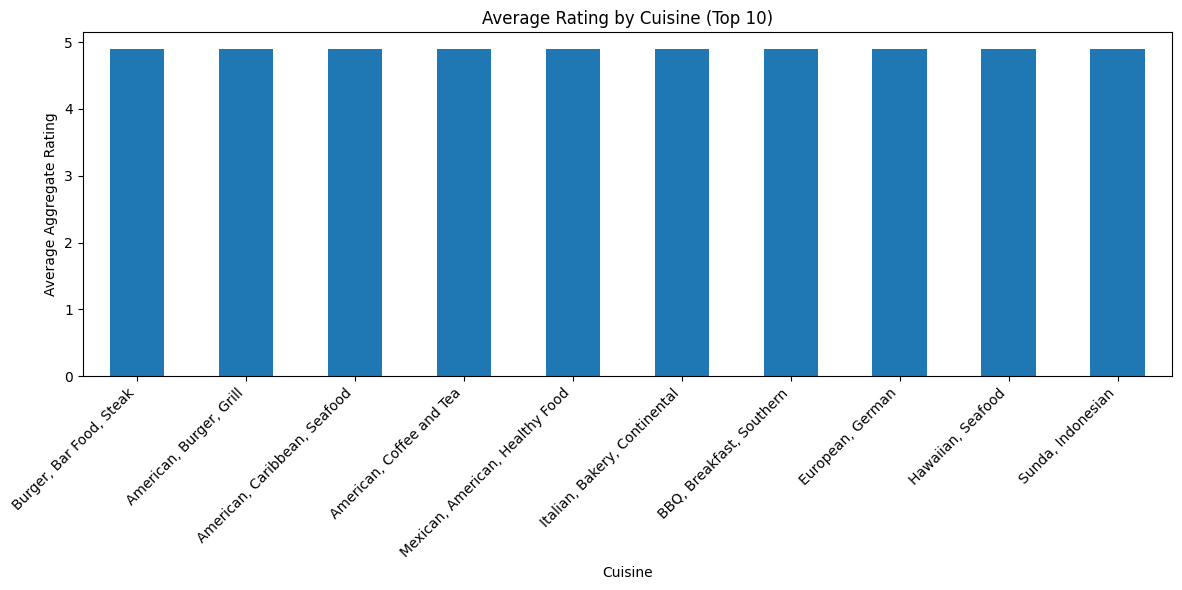

In [105]:
import matplotlib.pyplot as plt

# Create a bar chart for top 10 cuisines
plt.figure(figsize=(12, 6))
cuisine_ratings_sorted.head(10).plot(kind='bar')
plt.title('Average Rating by Cuisine (Top 10)')
plt.xlabel('Cuisine')
plt.ylabel('Average Aggregate Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**3.2:Identify the most popular cuisines among customers based on the number of votes**

**Step 1: Group and Sort Cuisines by Total Votes**

**Explanation:**This code groups all restaurants by their cuisine and adds up the total number of votes each type of cuisine received. Then it sorts the results from highest to lowest to identify the top 10 most voted cuisines, which are likely the most popular among customers.

In [106]:
# Group by cuisine and sum up the total votes for each cuisine
cuisine_popularity = df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)

# Display top 10 most popular cuisines based on votes
print("\nMost Popular Cuisines (by Votes):")
print(cuisine_popularity.head(10))



Most Popular Cuisines (by Votes):
Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


**Step 2: Visualize the Top Cuisines Using a Bar Chart**

**Explanation:**The bar chart visually presents the top 10 most popular cuisines based on the total votes. This makes it easy to compare and communicate which types of food are most favored by customers.

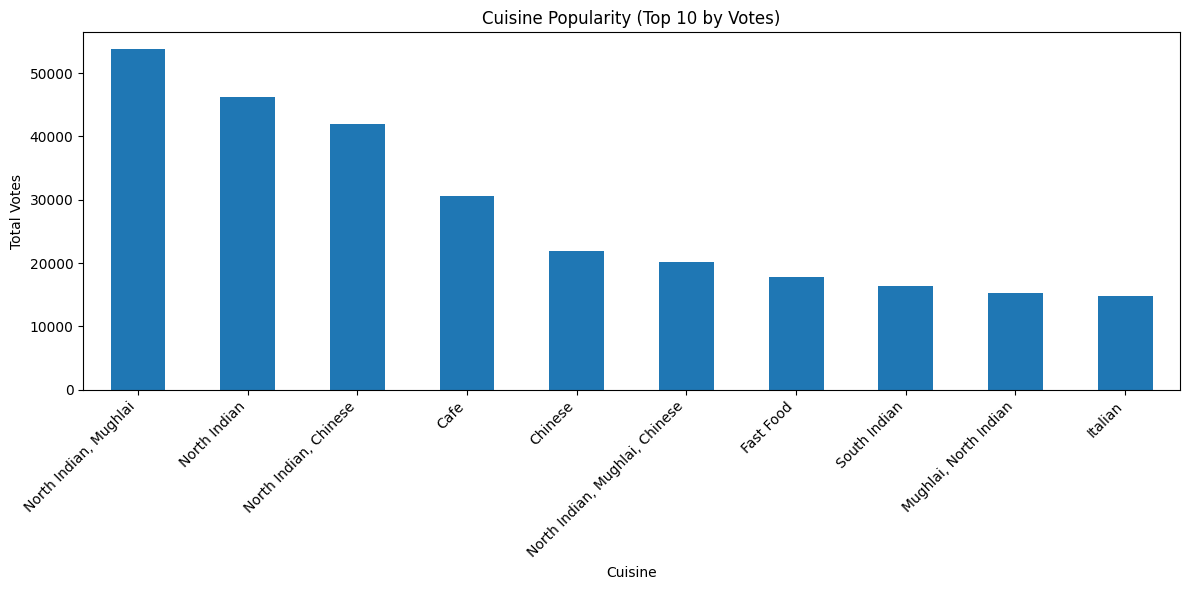

In [107]:
import matplotlib.pyplot as plt

# Plot the top 10 cuisines with the most votes
plt.figure(figsize=(12, 6))
cuisine_popularity.head(10).plot(kind='bar')
plt.title('Cuisine Popularity (Top 10 by Votes)')
plt.xlabel('Cuisine')
plt.ylabel('Total Votes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**3.3:Determine if there are any specific cuisines that tend to receive higher ratings**

**Step 1: Group and Calculate Average Ratings for Each Cuisine**

**Explanation:**We group the data by each cuisine, then calculate the average rating and count of restaurants per cuisine.This gives us an overview of which cuisines are most highly rated based on customer feedback.

In [108]:
# Group the data by cuisine type and calculate the average rating and the number of restaurants
df = pd.read_excel("cognify.xlsx")
# Group the data by cuisine type and calculate the average rating and the number of restaurants
cuisine_analysis = df.groupby('Cuisines').agg({'Aggregate rating': 'mean', 'Restaurant ID': 'count'})

# Rename the columns for clarity so it's easier to understand
cuisine_analysis = cuisine_analysis.rename(columns={'Aggregate rating': 'Average Rating', 'Restaurant ID': 'Restaurant Count'})

# Sort by the average rating to show the top cuisines with the highest ratings
top_cuisines_by_rating = cuisine_analysis.sort_values('Average Rating', ascending=False).head(10)
print("\nTop 10 Cuisines by Average Rating:")
print(top_cuisines_by_rating)



Top 10 Cuisines by Average Rating:
                                 Average Rating  Restaurant Count
Cuisines                                                         
Burger, Bar Food, Steak                     4.9                 1
American, Burger, Grill                     4.9                 1
American, Caribbean, Seafood                4.9                 1
American, Coffee and Tea                    4.9                 1
Mexican, American, Healthy Food             4.9                 1
Italian, Bakery, Continental                4.9                 1
BBQ, Breakfast, Southern                    4.9                 1
European, German                            4.9                 1
Hawaiian, Seafood                           4.9                 1
Sunda, Indonesian                           4.9                 3


**Step 2: Filter and Show Only Reliable Cuisines with Enough Restaurants**

**Explanation:**We filter out cuisines with fewer than 10 restaurants to avoid unreliable data.
Then, we sort the remaining cuisines by their average rating and display the top 10 to ensure accuracy.

In [109]:
# To avoid bias, we filter out cuisines with fewer than 10 restaurants
min_restaurants = 10
reliable_cuisines = cuisine_analysis[cuisine_analysis['Restaurant Count'] >= min_restaurants]

# Now, sort the reliable cuisines by their average rating and get the top 10
top_reliable_cuisines = reliable_cuisines.sort_values('Average Rating', ascending=False).head(10)
print(f"\nTop 10 Cuisines (with at least {min_restaurants} restaurants) by Average Rating:")
print(top_reliable_cuisines)



Top 10 Cuisines (with at least 10 restaurants) by Average Rating:
                            Average Rating  Restaurant Count
Cuisines                                                    
Modern Indian                     4.345455                11
Indian                            4.250000                18
Seafood                           4.114286                14
Thai                              4.100000                16
Cafe, Continental, Italian        4.080000                10
American, Burger                  4.076923                13
Japanese, Sushi                   4.044444                18
Pizza, Italian                    3.668421                19
American                          3.667742                31
Italian                           3.657407                54


**Level 3**

**Task 3: Data Visualization**


1.  Create visualizations to represent the distribution
of ratings using different charts (histogram, bar
plot, etc.).
2.   Compare the average ratings of different cuisines
or cities using appropriate visualizations
3.  Visualize the relationship between various
features and the target variable to gain insights.


**3.1:Analyze the relationship between the type of cuisine and the restaurant's rating**


**Step 1: Importing libraries and preparing the data**

**Explanation:**We're using matplotlib and seaborn to create our visualizations. The df DataFrame should already have the ratings in the 'Aggregate rating' column.

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns  # Also needed for some advanced plots

# We assume you already have a DataFrame named 'df' with a column called 'Aggregate rating'


**Step 2: Plotting the distribution using different chart types**

**Explanation:**This shows how many restaurants fall into each rating range using bars. Good for seeing the shape of the data.

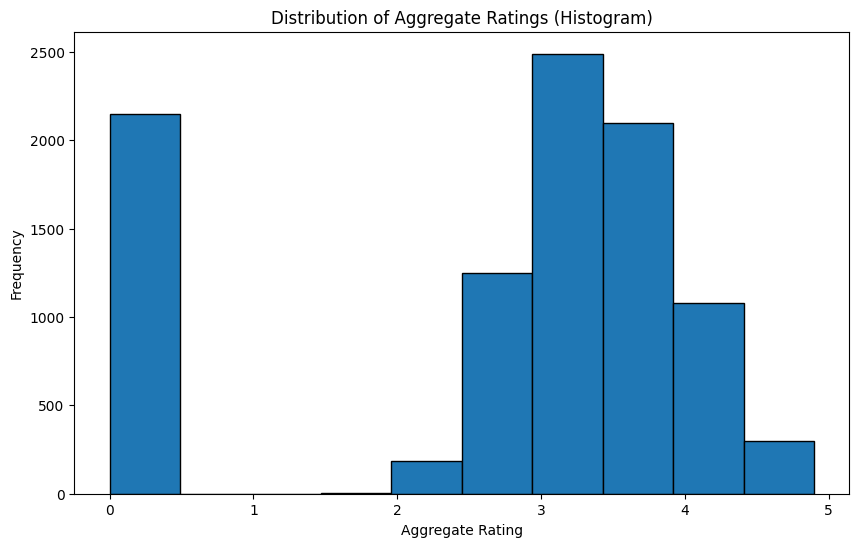

In [111]:
plt.figure(figsize=(10, 6))
plt.hist(df['Aggregate rating'], bins=10, edgecolor='black')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Aggregate Ratings (Histogram)')
plt.show()


** Bar Plot**

**Explanation:**This is great for discrete values like star ratings (e.g., 3.0, 3.5, 4.0). It counts how many restaurants have each specific rating.



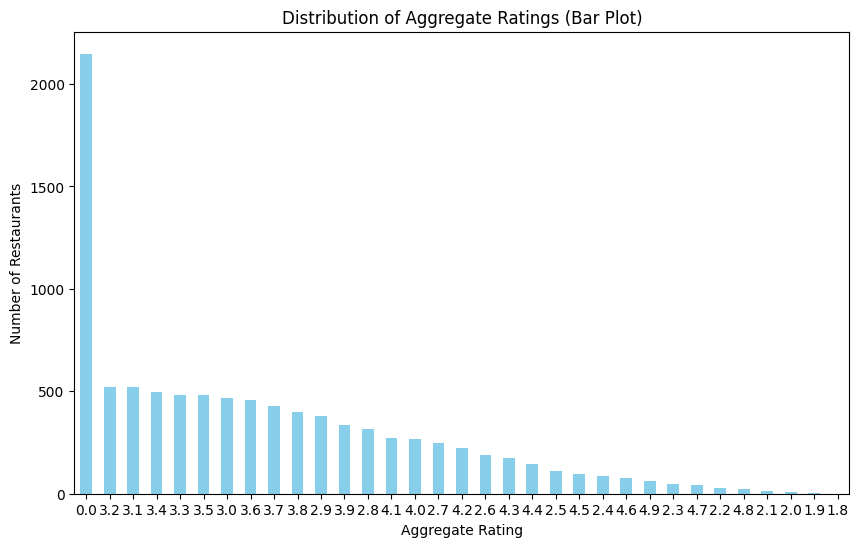

In [112]:
rating_counts = df['Aggregate rating'].value_counts()
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Aggregate Ratings (Bar Plot)')
plt.xticks(rotation=0)
plt.show()


**🔹 Box Plot**

**Explanation:**This shows the median, quartiles, and any outliers in the ratings. It's a compact summary of the data spread.

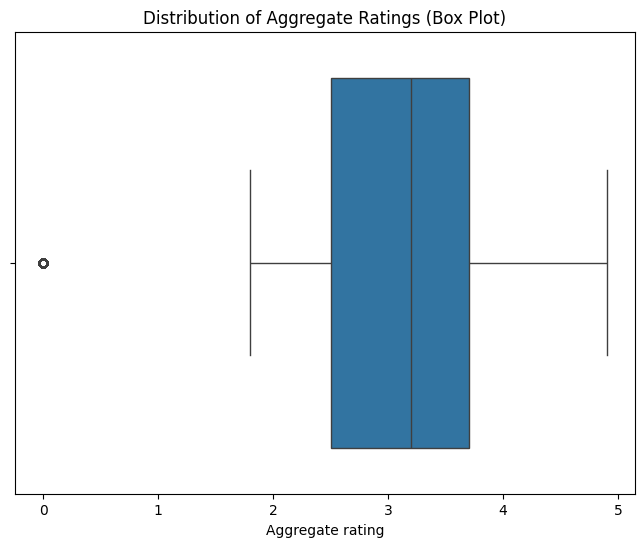

In [113]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Aggregate rating'])
plt.title('Distribution of Aggregate Ratings (Box Plot)')
plt.show()


**Violin Plot**

**Explanation:**It combines a box plot with a density curve, helping you see where most ratings are concentrated.

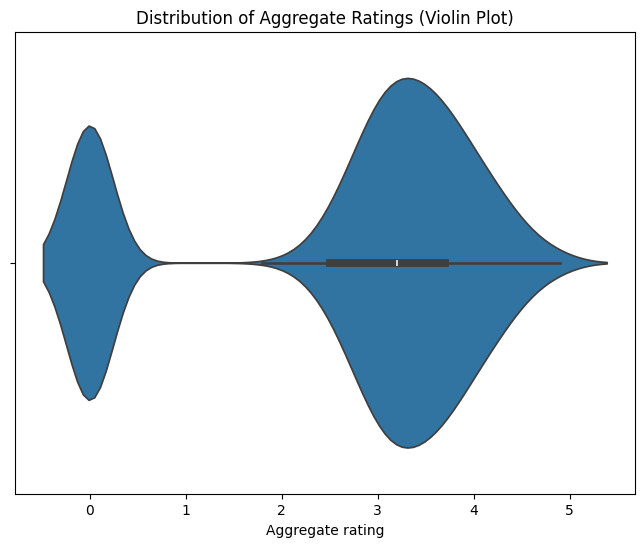

In [114]:
plt.figure(figsize=(8,6))
sns.violinplot(x=df['Aggregate rating'])
plt.title('Distribution of Aggregate Ratings (Violin Plot)')
plt.show()


In [115]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

**3.2:Compare the average ratings of different cuisines or cities using appropriate visualizations**

** Step 1: Compare average ratings of different cuisines**

**Explanation:**We grouped the data by Cuisines, calculated the average rating for each, then showed the top 15 using a bar chart. This helps us see which cuisines are rated highest.

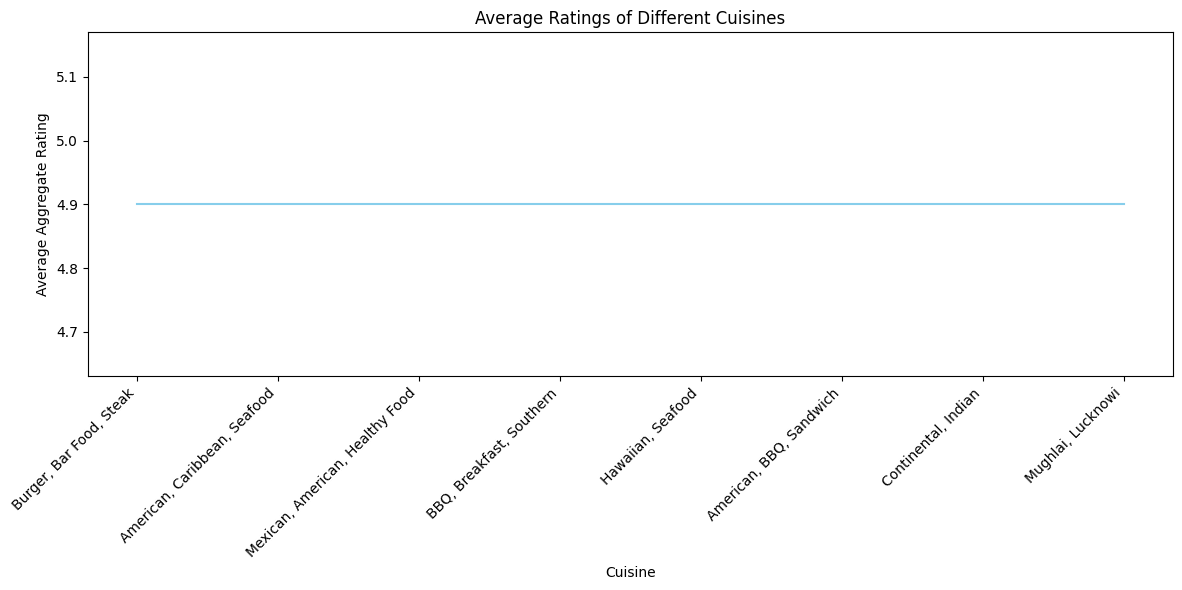

In [122]:
import matplotlib.pyplot as plt

# Group by 'Cuisines' and calculate average rating
cuisine_avg_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

# Plot the top 10 cuisines with highest average ratings
plt.figure(figsize=(12, 6))
cuisine_avg_ratings.head(15).plot(kind='line', color='skyblue')
plt.title('Average Ratings of Different Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Average Aggregate Rating')
plt.xticks(rotation=45, ha='right')  # Rotates x-labels for better readability
plt.tight_layout()
plt.show()


**Step 2: Compare average ratings of different cities**

**Explanation:**Same idea as with cuisines — we grouped by City, calculated the average rating for each, and plotted the top 10 cities. This shows which cities generally have the best-rated restaurants.



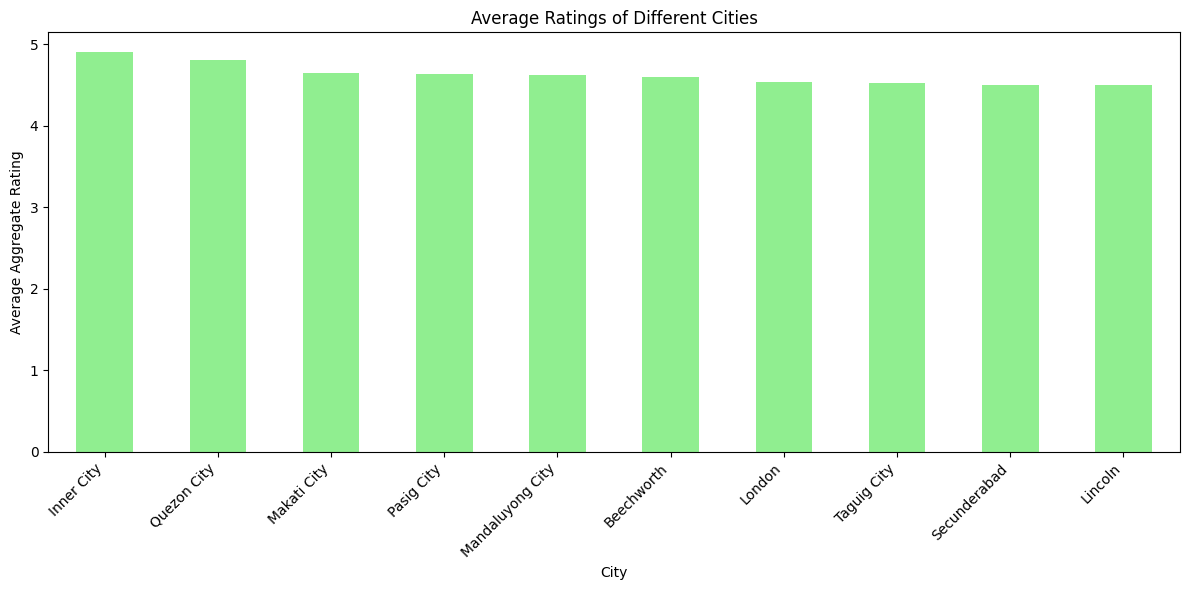

In [117]:
# Group by 'City' and calculate average rating
city_avg_ratings = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

# Plot the top 10 cities with highest average ratings
plt.figure(figsize=(12, 6))
city_avg_ratings.head(10).plot(kind='bar', color='lightgreen')
plt.title('Average Ratings of Different Cities')
plt.xlabel('City')
plt.ylabel('Average Aggregate Rating')
plt.xticks(rotation=45, ha='right')  # Makes city names readable
plt.tight_layout()
plt.show()


**3.3:Visualize the relationship between various features and the target variable to gain insights.**

**Step 1: Visualize relationships between individual features and ratings**

**Explanation:**This plot helps us see if higher or lower costs are linked to better ratings. Each point represents a restaurant.




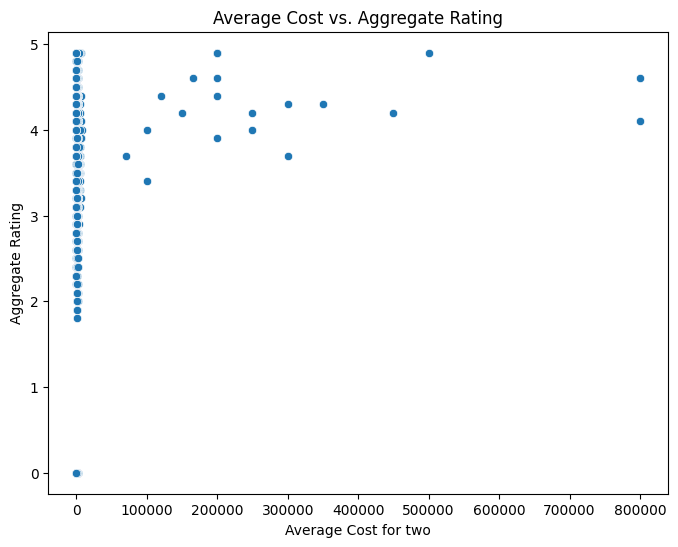

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Cost vs Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Average Cost for two', y='Aggregate rating', data=df)
plt.title('Average Cost vs. Aggregate Rating')
plt.xlabel('Average Cost for two')
plt.ylabel('Aggregate Rating')
plt.show()


**# Box plot: Price range vs Rating**

**Explanation:**The box plot shows how ratings vary across different price levels. It also highlights outliers and medians.

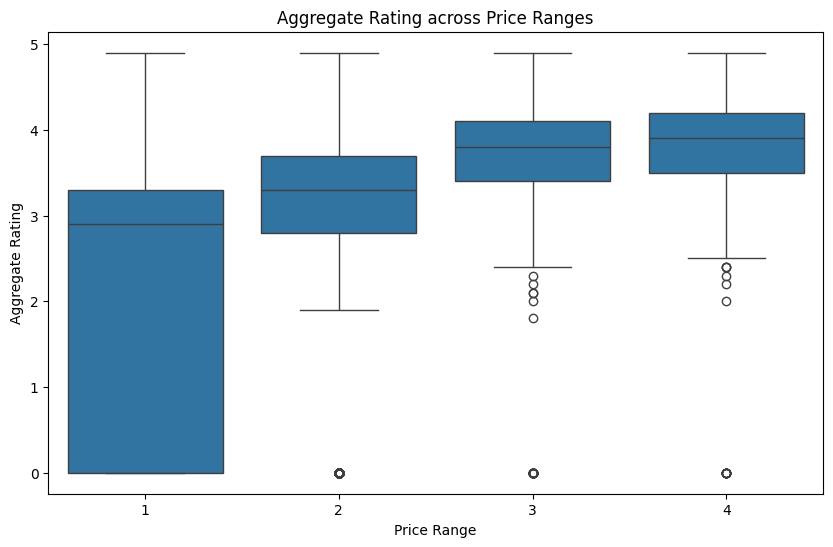

In [119]:
# Box plot: Price range vs Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price range', y='Aggregate rating', data=df)
plt.title('Aggregate Rating across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()


**Step 2: Explore multiple relationships at once**

**Explanation:**A pair plot lets us see how multiple numerical features relate to each other and to the target (ratings) in one big grid.

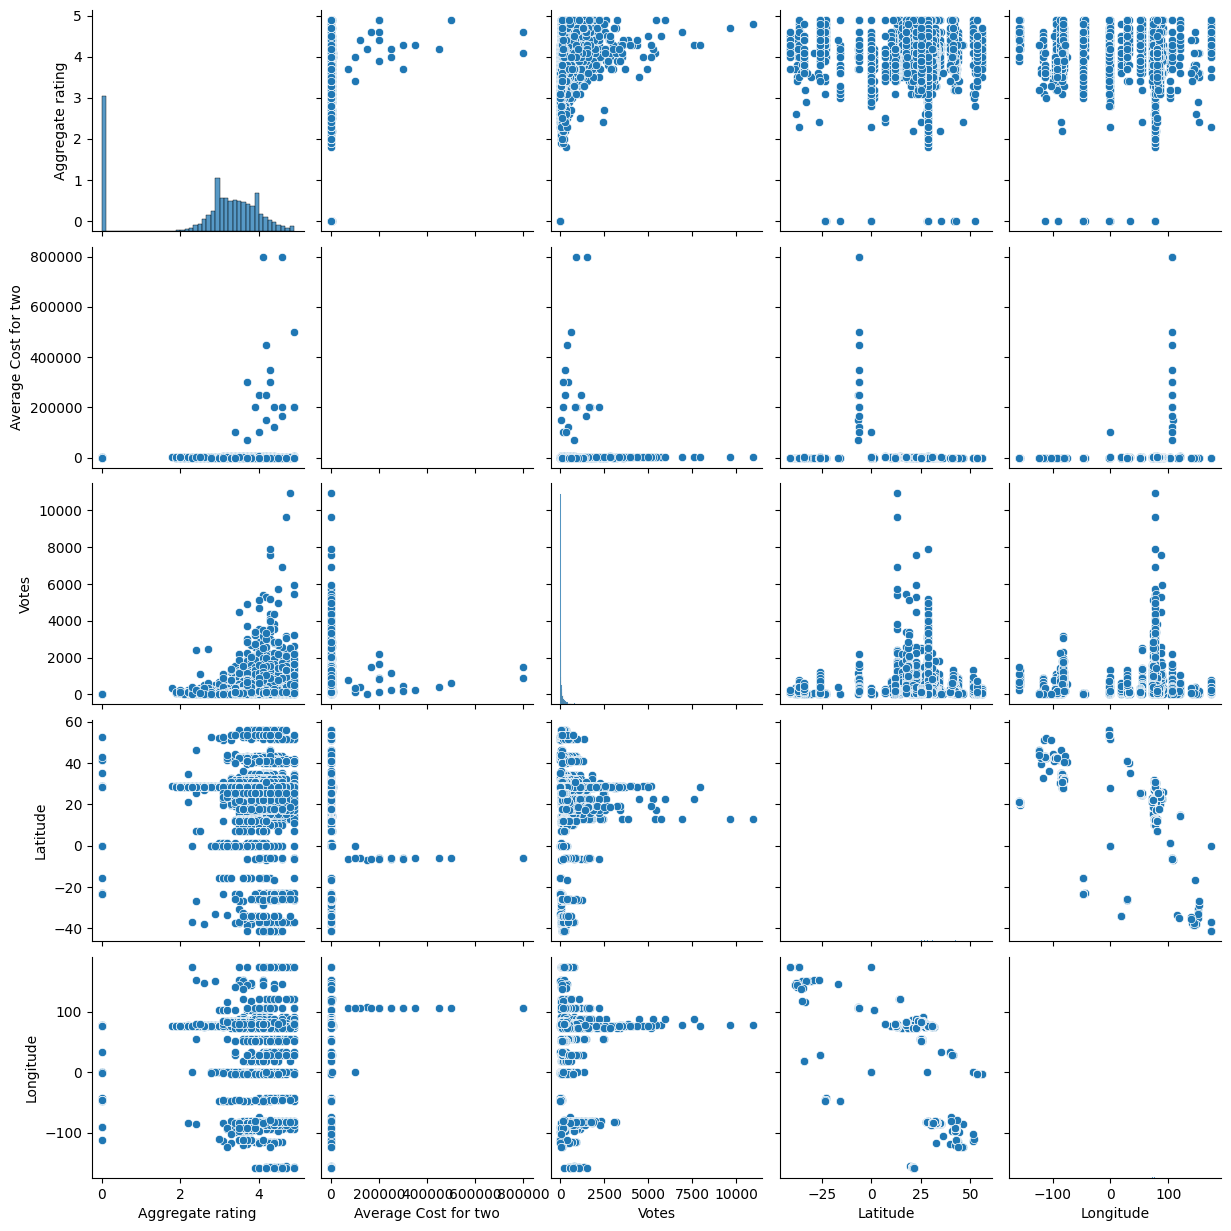

In [120]:
# Pair plot: Compare multiple numeric features
numerical_cols = ['Aggregate rating', 'Average Cost for two', 'Votes', 'Latitude', 'Longitude']
sns.pairplot(df[numerical_cols])
plt.show()


**# Heatmap: Correlation between features**

**Explanation:**The heatmap gives a quick overview of how strongly different numeric columns are related (positive or negative correlation).



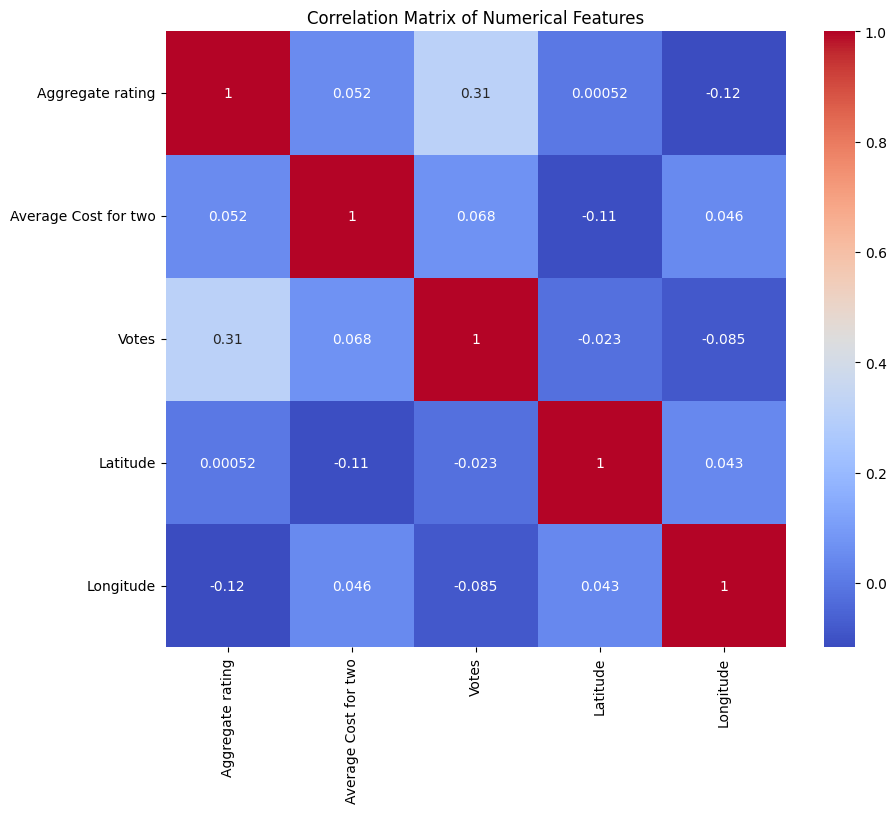

In [121]:
# Heatmap: Correlation between features
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()
